In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from sklearn.linear_model import LogisticRegression

In [2]:
data = [
        ('солнечно', True),
        ('снег', False),
        ('облачно', False),
        ('дождь', False),
        ('солнечно', True),
        ('снег', False),
        ('облачно', True),
        ('снег', False),
        ('солнечно', False),
        ('облачно', True),
        ('снег', True),
        ('солнечно', True),
        ('дождь', False),
        ('дождь', True),
        ('облачно', True),
]

In [3]:
probality=(1/3)/(8/15)*(1/5)
probality

0.125

Задание 2

In [4]:
data= pd.read_csv('D:\ML\data\diabetes.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [6]:
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [7]:
data=data.astype(int)
data.drop_duplicates()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,1,45,0,0,0,0,1,...,1,0,3,0,5,0,1,5,6,7
253676,2,1,1,1,18,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,0,1,28,0,0,0,1,1,...,1,0,1,0,0,0,0,2,5,2
253678,0,1,0,1,23,0,0,0,0,1,...,1,0,3,0,0,0,1,7,5,1


In [8]:
data['Diabetes_012'].loc[data['Diabetes_012']==2]=1

Предобработка завершена
Р разобъём на выборки

In [9]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.2)

Проверим на сбалансированность по признаку Diabetes_012 

<AxesSubplot: >

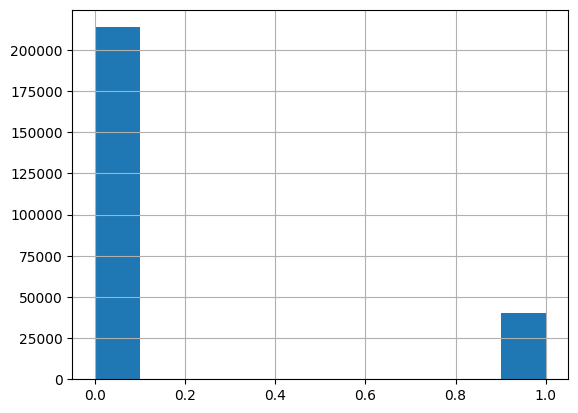

In [10]:
data.Diabetes_012.hist()

Дисбаланс присутствует

Будем его лечить

<AxesSubplot: >

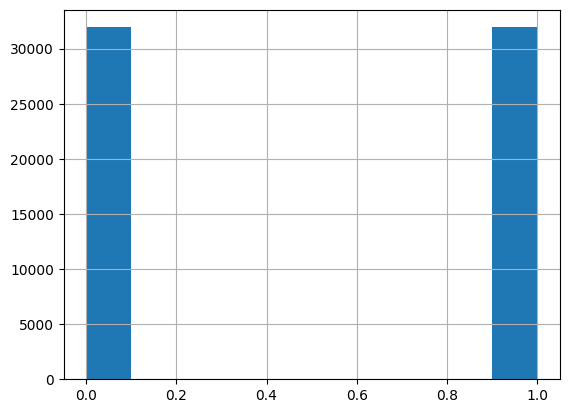

In [11]:
from sklearn.utils import resample
maj_class = train_data[train_data['Diabetes_012'] == 0]
min_class = train_data[train_data['Diabetes_012'] == 1]
 
maj_downsampled = resample(maj_class, n_samples=len(min_class), random_state=42)
 
sampled_data = pd.concat((maj_downsampled, min_class))

sampled_data.Diabetes_012.hist()

Дисбаланс устранён

Выделим ключевый признак

In [12]:
y_train =sampled_data["Diabetes_012"]
x_train = sampled_data.drop(["Diabetes_012"], axis=1)
y_test =test_data["Diabetes_012"]
x_test = test_data.drop(["Diabetes_012"], axis=1)

In [13]:
x_train.shape,x_test.shape

((63882, 21), (50736, 21))

Масштабируем

In [14]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [15]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [16]:
x_test.shape

(50736, 21)

Решим задачу классивикации методом knn

Сразу рассмотри несколько параметров и выведем характеристики для каждого

In [17]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_curve, confusion_matrix, classification_report,roc_auc_score

In [19]:
parameters = [3,7,15,31]
resultsknn=[]
for i in parameters:
    knn=KNeighborsClassifier(n_neighbors=i,metric='minkowski', p=2,weights='distance').fit(x_train, y_train)
    y_bin_knn_pred = knn.predict(x_test)
    resultsknn.append(y_bin_knn_pred)
    print( classification_report(y_test, y_bin_knn_pred))
    print("roc_curve_auc ",roc_auc_score(y_test, y_bin_knn_pred))

              precision    recall  f1-score   support

           0       0.92      0.67      0.77     42700
           1       0.28      0.70      0.40      8036

    accuracy                           0.67     50736
   macro avg       0.60      0.68      0.59     50736
weighted avg       0.82      0.67      0.71     50736

roc_curve_auc  0.6834324637491942
              precision    recall  f1-score   support

           0       0.93      0.68      0.78     42700
           1       0.30      0.74      0.43      8036

    accuracy                           0.69     50736
   macro avg       0.62      0.71      0.61     50736
weighted avg       0.83      0.69      0.73     50736

roc_curve_auc  0.7060735705717713
              precision    recall  f1-score   support

           0       0.94      0.69      0.79     42700
           1       0.31      0.76      0.44      8036

    accuracy                           0.70     50736
   macro avg       0.63      0.72      0.62     50736
weight

В целом параметр 15 показал хороший результат

Выведем кривую ROC для параметра 15

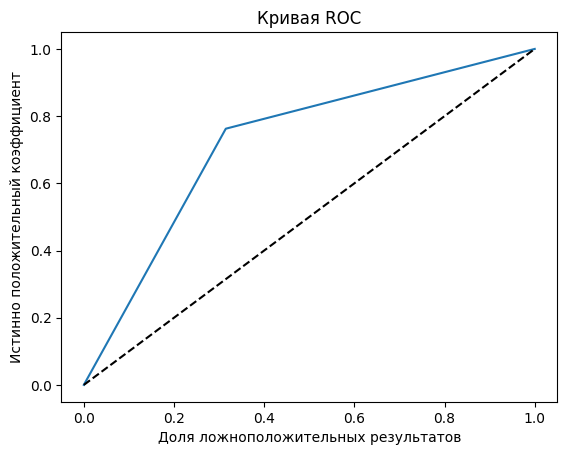

In [20]:

fpr, tpr, plot = roc_curve(y_test, resultsknn[2])

plt.plot(fpr, tpr)
plt.xlabel('Доля ложноположительных результатов')
plt.plot([0, 1], [0, 1], 'k--')
plt.ylabel('Истинно положительный коэффициент')
plt.title('Кривая ROC')
plt.show()

Решим задачу классивикации методом Naive Bayes

Сразу рассмотри несколько параметров и выведем характеристики для каждого

In [21]:
from sklearn.naive_bayes import GaussianNB


gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
print(classification_report(y_test, y_pred))
print("roc_curve_auc ",roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.73      0.82     42700
           1       0.32      0.69      0.44      8036

    accuracy                           0.72     50736
   macro avg       0.63      0.71      0.63     50736
weighted avg       0.83      0.72      0.76     50736

roc_curve_auc  0.7091101926576308


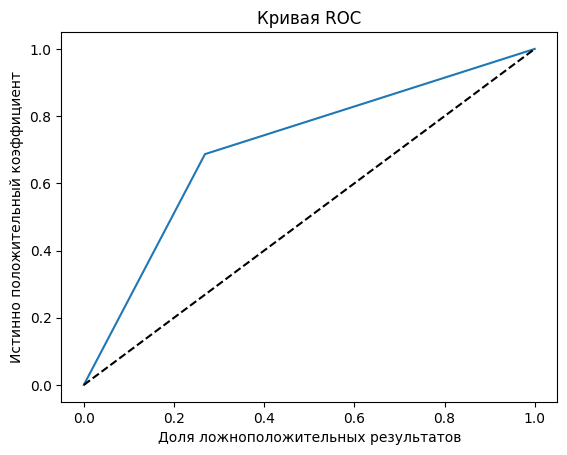

In [22]:
fpr, tpr, plot = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlabel('Доля ложноположительных результатов')
plt.plot([0, 1], [0, 1], 'k--')
plt.ylabel('Истинно положительный коэффициент')
plt.title('Кривая ROC')
plt.show()

Решим задачу классивикации методом логистической регрессии

Сразу рассмотри несколько параметров и выведем характеристики для каждого

In [23]:


parameters = {'C': [0.2,0.5,0.7,1,1.5]}
clf = GridSearchCV(LogisticRegression(), parameters).fit(x_train, y_train)
print(clf.best_params_)

y_pred1 = clf.predict(x_test)
print(classification_report(y_test, y_pred1))
print("roc_curve_auc ",roc_auc_score(y_test, y_pred1))



{'C': 0.2}
              precision    recall  f1-score   support

           0       0.94      0.72      0.82     42700
           1       0.34      0.76      0.47      8036

    accuracy                           0.73     50736
   macro avg       0.64      0.74      0.64     50736
weighted avg       0.85      0.73      0.76     50736

roc_curve_auc  0.7413607210177152


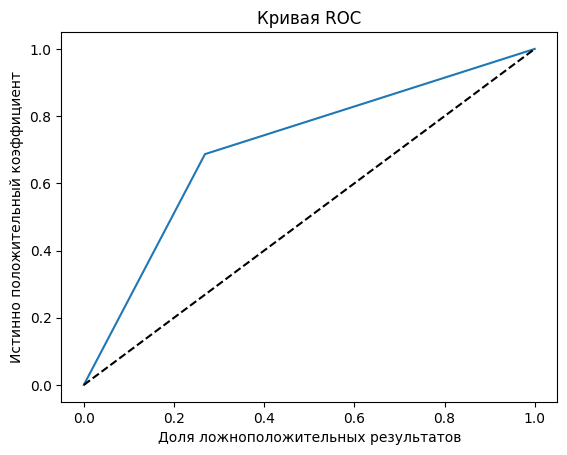

In [24]:
fpr, tpr, plot = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlabel('Доля ложноположительных результатов')
plt.plot([0, 1], [0, 1], 'k--')
plt.ylabel('Истинно положительный коэффициент')
plt.title('Кривая ROC')
plt.show()

Решим задачу классивикации методом SVM

Сразу рассмотри несколько параметров и выведем характеристики для каждого

In [43]:
from sklearn import svm

In [61]:

x_train1, x_test1,y_train1,y_test1 = train_test_split(x_test,y_test, test_size=0.98,stratify=y_test)

In [62]:
x_train1.shape

(1014, 21)

In [27]:
clf2=svm.SVC()

In [63]:
parameters = {'C': [0.2]}
clf2 = GridSearchCV(svm.SVC(), parameters).fit(x_train1, y_train1)
print(clf2.best_params_)

y_pred1 = clf2.predict(x_test1)
print(classification_report(y_test1, y_pred1))
print("roc_curve_auc ",roc_auc_score(y_test1, y_pred1))

{'C': 0.2}
              precision    recall  f1-score   support

           0       0.84      1.00      0.91     41847
           1       0.00      0.00      0.00      7875

    accuracy                           0.84     49722
   macro avg       0.42      0.50      0.46     49722
weighted avg       0.71      0.84      0.77     49722

roc_curve_auc  0.5


D:\ML-Labs\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ML-Labs\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ML-Labs\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Построим итоговую модель классификаторов

In [29]:
classifiers = {
    'KNN classifier': KNeighborsClassifier(n_neighbors=15).fit(x_train,y_train),
    'Naive Bayes': gnb,
    'LogisticRegression':clf
    #'SVC': SVC(C=0.2)#,
}

In [30]:
n_classifiers = len(classifiers)

for index, (name, classifier) in enumerate(classifiers.items()):

    y_pred = classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))
    print(classification_report(y_test,y_pred))

Accuracy (train) for KNN classifier: 70.2% 
              precision    recall  f1-score   support

           0       0.94      0.69      0.80     42700
           1       0.32      0.76      0.45      8036

    accuracy                           0.70     50736
   macro avg       0.63      0.73      0.62     50736
weighted avg       0.84      0.70      0.74     50736

Accuracy (train) for Naive Bayes: 72.4% 
              precision    recall  f1-score   support

           0       0.93      0.73      0.82     42700
           1       0.32      0.69      0.44      8036

    accuracy                           0.72     50736
   macro avg       0.63      0.71      0.63     50736
weighted avg       0.83      0.72      0.76     50736

Accuracy (train) for LogisticRegression: 72.9% 
              precision    recall  f1-score   support

           0       0.94      0.72      0.82     42700
           1       0.34      0.76      0.47      8036

    accuracy                           0.73     5

Задание 3: реализовать метрики: Accuracy, precision, recall, f1-score, реализовать knn

In [31]:
def accuracy(y_test,y_pred):
    y_test=y_test-y_pred
    return np.count_nonzero(y_test==0)/len(y_test)

In [32]:
def  precision(y_test, y_pred):
    tp = 0
    for i in range(len(y_pred)):
        if y_test.to_numpy()[i] == 1 and y_pred[i] == 1:
            tp += 1
    return tp / np.count_nonzero(y_pred==1)

In [33]:
def  recall(y_test, y_pred):
    tp = 0
    for i in range(len(y_pred)):
        if y_test.to_numpy()[i] == 1 and y_pred[i] == 1:
            tp += 1
    return tp / np.count_nonzero(y_test==1)

In [34]:
def f1_score(y_true, y_pred):
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    if prec + rec == 0:
        return 0
    return 2 * (prec * rec) / (prec + rec)

In [35]:
def ed(x1, x2): #Евклидово расстояние
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN:
    # Устанавливаем параметры
    def __init__(self, n_neighboors=3):
        self.n_neighboors = n_neighboors
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def predict(self, X):#внешний метод предикт для датабазы
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)
    
    def _predict(self, x):#внутрений метод предикт для 1 элемента
        distances = [ed(x, x_train) for x_train in self.X_train]
        
        n_ind= np.argsort(distances)[:self.n_neighboors]
        
        n_nearest_points = [self.y_train[i] for i in n_ind]

        counts = np.bincount(n_nearest_points)
        most_common = np.argmax(counts)

        return most_common

In [36]:
x_train0=np.array([[1,4,15],[4,23,12],[32,3,45],[23,23,23],[0,0,0],[145,234,345]])
y_train0=np.array([0,0,1,1,0,1])
x_test0=np.array([[14,34,0],[32,12,0],[91,40,60]])
y_test0=np.array([0,1,1])

knn=KNN(n_neighboors=3)
knn.fit(x_train0,y_train0)
y_pred0=knn.predict(x_test0)
y_pred0

array([0, 0, 1], dtype=int64)

In [37]:
accuracy(y_pred0,y_test0)

0.6666666666666666

In [41]:
print(accuracy(y_pred,y_test), precision(y_test,y_pred),recall(y_test,y_pred),f1_score(y_test,y_pred))

0.7291666666666666 0.3407047523314905 0.7592085614733698 0.4703388197201558
